In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,Internet_Usage_Percent,International_Tourism_Visitors,Life_Expectancy_Female,Life_Expectancy_Male,Physicians_Per_Thousand,Total_Population,Women_Parliament_Percent,Tertiary_Edu_Female_Percent,Tertiary_Edu_Male_Percent,GHG_Emissions_Tons
0,21.9378,1.749147e+06,71.2771,66.9263,0.1155,6239,61.0323,6.3367,7.0570,3.820465e+05
1,93.7949,2.035742e+07,83.5099,80.5076,3.5837,12292,33.5067,92.2077,81.6027,1.127124e+04
2,-0.0618,1.068492e+07,75.7448,68.7288,3.6830,4661,17.6070,17.4043,35.3766,1.869532e+03
3,84.9416,7.262365e+06,76.0624,71.6838,1.9993,10213,12.8649,21.6965,8.5485,7.077515e+04
4,67.1008,5.354778e+06,76.2688,72.7053,2.3522,4874,11.3989,36.8052,31.4653,1.234594e+07


In [3]:
train.shape

(12604, 10)

In [4]:
train.isnull().sum()

Internet_Usage_Percent            0
International_Tourism_Visitors    0
Life_Expectancy_Female            0
Life_Expectancy_Male              0
Physicians_Per_Thousand           0
Total_Population                  0
Women_Parliament_Percent          0
Tertiary_Edu_Female_Percent       0
Tertiary_Edu_Male_Percent         0
GHG_Emissions_Tons                0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
train.describe()

,Internet_Usage_Percent,International_Tourism_Visitors,Life_Expectancy_Female,Life_Expectancy_Male,Physicians_Per_Thousand,Total_Population,Women_Parliament_Percent,Tertiary_Edu_Female_Percent,Tertiary_Edu_Male_Percent,GHG_Emissions_Tons
count,12604.000000,1.260400e+04,12604.000000,12604.000000,12604.000000,12604.000000,12604.000000,12604.000000,12604.000000,1.260400e+04
mean,55.534180,1.120541e+07,75.533146,70.645533,1.826454,6452.840606,23.776320,43.733788,34.430161,2.617812e+05
std,30.058963,2.647629e+07,7.535100,7.125491,1.597820,3727.326867,11.582953,33.065799,25.519913,1.052899e+06
min,-0.598200,-5.178043e+05,55.346900,50.946500,-0.017700,1.000000,-0.225000,-0.578400,-0.312800,3.682100e+00
25%,27.163750,6.879145e+05,71.062850,66.192025,0.425425,3227.750000,16.152950,13.889950,13.731225,1.851234e+04
50%,62.196650,2.315322e+06,76.936200,71.002200,1.578750,6452.500000,23.650500,43.141050,33.956200,5.009884e+04
75%,81.736925,1.080365e+07,80.939150,75.728250,2.774500,9681.250000,29.680925,68.494125,51.362900,2.039836e+05
max,100.297200,2.125085e+08,88.248700,84.238100,8.453100,12905.000000,61.476200,143.542300,143.327100,1.237406e+07


In [7]:
test = pd.read_csv('Test.csv')
test.head()

,Internet_Usage_Percent,International_Tourism_Visitors,Life_Expectancy_Female,Life_Expectancy_Male,Physicians_Per_Thousand,Total_Population,Women_Parliament_Percent,Tertiary_Edu_Female_Percent,Tertiary_Edu_Male_Percent,GHG_Emissions_Tons
0,89.0211,3.533105e+06,84.4312,79.1132,3.8085,8531,45.9811,97.5839,83.0792,NaN
1,59.6911,2.377165e+06,86.8847,84.0620,6.1202,11449,33.4892,44.3532,57.9135,NaN
2,38.0115,8.588383e+06,75.8815,67.5656,2.1821,6618,16.6791,47.0217,37.4194,NaN
3,73.2132,-4.821713e+04,80.0467,75.5202,1.7159,504,23.9849,43.3413,33.9596,NaN
4,82.2295,2.395142e+07,78.1954,68.2312,4.0373,9927,15.6005,91.2028,77.3159,NaN


In [8]:
test.shape

(300, 10)

In [9]:
test.isnull().sum()

Internet_Usage_Percent              0
International_Tourism_Visitors      0
Life_Expectancy_Female              0
Life_Expectancy_Male                0
Physicians_Per_Thousand             0
Total_Population                    0
Women_Parliament_Percent            0
Tertiary_Edu_Female_Percent         0
Tertiary_Edu_Male_Percent           0
GHG_Emissions_Tons                300
dtype: int64

In [19]:
test.duplicated().sum()

0

In [21]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(12904, 10)

C:\Users\ahpat\AppData\Local\Temp\ipykernel_19268\3593076709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GHG_Emissions_Tons'], kde = True)


<Axes: xlabel='GHG_Emissions_Tons', ylabel='Density'>

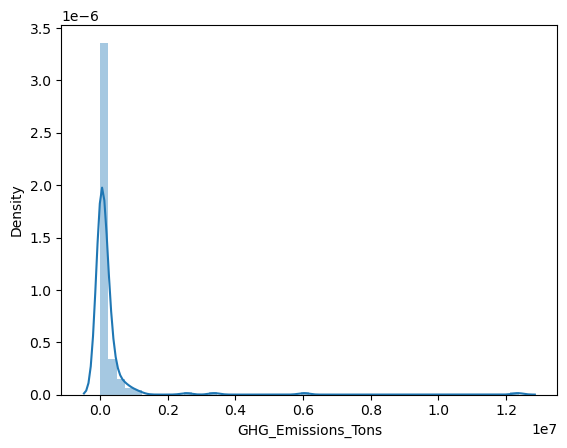

In [23]:
sns.distplot(train['GHG_Emissions_Tons'], kde = True)

In [25]:
input_variables = combined.drop('GHG_Emissions_Tons', axis = 1)

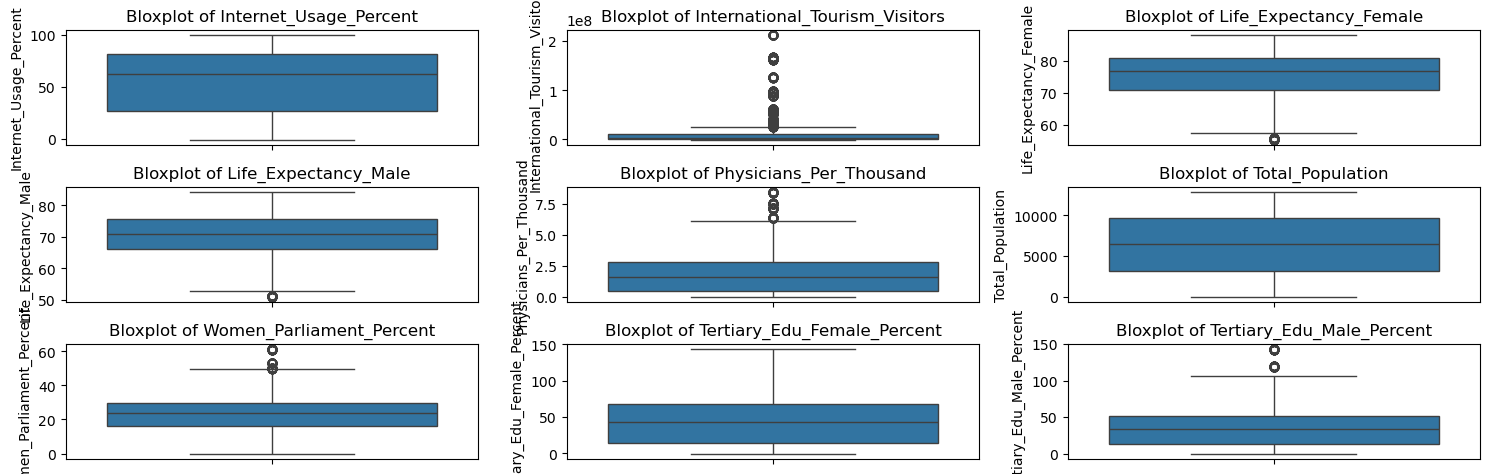

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(input_variables.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [29]:
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    median_value = df[column].median()
    df[column] = np.where((df[column]<lower)|(df[column]>upper), median_value, df[column])
    return df

In [31]:
for col in input_variables.columns:
    concat_df = replace_outliers(combined, col)

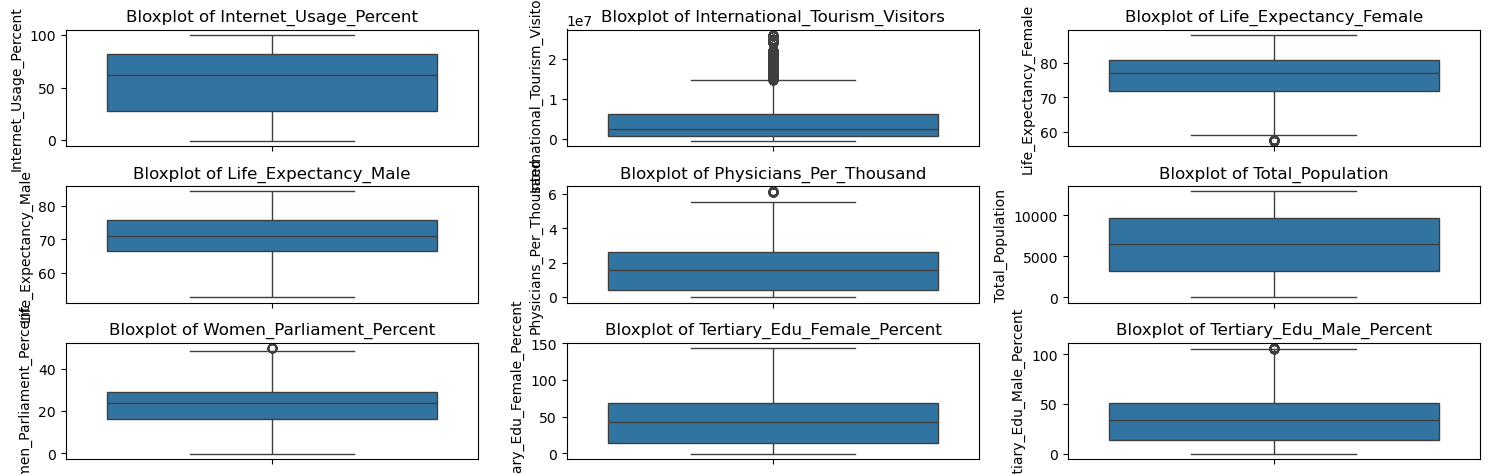

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(input_variables.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [35]:
combined['Life_Expectancy_Gap'] = combined['Life_Expectancy_Female'] - combined['Life_Expectancy_Male']
combined['Avg_Life_Expectancy'] = (combined['Life_Expectancy_Female'] + combined['Life_Expectancy_Male']) / 2
combined['Physicians_Per_Million'] = combined['Physicians_Per_Thousand'] * 1000
combined['Doctors_to_Population_Ratio'] = (combined['Physicians_Per_Thousand'] / 1000) / combined['Total_Population']
combined['Internet_Users_Total'] = (combined['Internet_Usage_Percent'] / 100) * combined['Total_Population']
combined['Tech_Education_Index'] = (combined['Internet_Usage_Percent'] + combined['Tertiary_Edu_Male_Percent'] + combined['Tertiary_Edu_Female_Percent'])
combined['Tertiary_Edu_Gap'] = combined['Tertiary_Edu_Female_Percent'] - combined['Tertiary_Edu_Male_Percent']
combined['Gender_Equality_Composite'] = (combined['Women_Parliament_Percent'] + combined['Tertiary_Edu_Female_Percent'] - combined['Tertiary_Edu_Male_Percent'])
combined['Tourism_Per_Capita'] = combined['International_Tourism_Visitors'] / combined['Total_Population']
combined['Tourism_Intensity'] = combined['International_Tourism_Visitors'] * combined['Internet_Usage_Percent']
combined['Women_Leadership_Score'] = combined['Women_Parliament_Percent'] * combined['Tertiary_Edu_Female_Percent']
combined['Population_Density_Proxy'] = combined['Total_Population'] * combined['Internet_Usage_Percent']
combined['Health_Dev_Index'] = combined['Physicians_Per_Thousand'] * combined['Avg_Life_Expectancy']

In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12904 entries, 0 to 299
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Internet_Usage_Percent          12904 non-null  float64
 1   International_Tourism_Visitors  12904 non-null  float64
 2   Life_Expectancy_Female          12904 non-null  float64
 3   Life_Expectancy_Male            12904 non-null  float64
 4   Physicians_Per_Thousand         12904 non-null  float64
 5   Total_Population                12904 non-null  float64
 6   Women_Parliament_Percent        12904 non-null  float64
 7   Tertiary_Edu_Female_Percent     12904 non-null  float64
 8   Tertiary_Edu_Male_Percent       12904 non-null  float64
 9   GHG_Emissions_Tons              12604 non-null  float64
 10  Life_Expectancy_Gap             12904 non-null  float64
 11  Avg_Life_Expectancy             12904 non-null  float64
 12  Physicians_Per_Million          12904 n

In [39]:
newtrain = combined.iloc[0:12604, :]
newtest = combined.iloc[12604:, :].drop('GHG_Emissions_Tons', axis = 1)

In [41]:
newtrain.head()

,Internet_Usage_Percent,International_Tourism_Visitors,Life_Expectancy_Female,Life_Expectancy_Male,Physicians_Per_Thousand,Total_Population,Women_Parliament_Percent,Tertiary_Edu_Female_Percent,Tertiary_Edu_Male_Percent,GHG_Emissions_Tons,...,Doctors_to_Population_Ratio,Internet_Users_Total,Tech_Education_Index,Tertiary_Edu_Gap,Gender_Equality_Composite,Tourism_Per_Capita,Tourism_Intensity,Women_Leadership_Score,Population_Density_Proxy,Health_Dev_Index
0,21.9378,1.749147e+06,71.2771,66.9263,0.1155,6239.0,23.64645,6.3367,7.0570,3.820465e+05,...,1.851258e-08,1368.699342,35.3315,-0.7203,22.92615,280.356982,3.837244e+07,149.840460,1.368699e+05,7.981246
1,93.7949,2.035742e+07,83.5099,80.5076,3.5837,12292.0,33.50670,92.2077,81.6027,1.127124e+04,...,2.915473e-07,11529.269108,267.6053,10.6050,44.11170,1656.151922,1.909422e+09,3089.575742,1.152927e+06,293.894757
2,-0.0618,1.068492e+07,75.7448,68.7288,3.6830,4661.0,17.60700,17.4043,35.3766,1.869532e+03,...,7.901738e-07,-2.880498,52.7191,-17.9723,-0.36530,2292.409421,-6.603281e+05,306.437510,-2.880498e+02,266.048134
3,84.9416,7.262365e+06,76.0624,71.6838,1.9993,10213.0,12.86490,21.6965,8.5485,7.077515e+04,...,1.957603e-07,8675.085608,115.1866,13.1480,26.01290,711.090294,6.168769e+08,279.123303,8.675086e+05,147.694489
4,67.1008,5.354778e+06,76.2688,72.7053,2.3522,4874.0,11.39890,36.8052,31.4653,1.234594e+07,...,4.826016e-07,3270.492992,135.3713,5.3399,16.73880,1098.641304,3.593099e+08,419.538794,3.270493e+05,175.208439


In [43]:
newtrain.shape

(12604, 23)

In [45]:
newtest.shape

(300, 22)

In [47]:
X = newtrain.drop(columns=['GHG_Emissions_Tons'])
y = newtrain['GHG_Emissions_Tons']
k = 12  
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
mask = selector.get_support()
selected_features = X.columns[mask]
print(f"Top {k} selected features:")
print(selected_features)

Top 12 selected features:
Index(['Internet_Usage_Percent', 'Life_Expectancy_Female',
       'Physicians_Per_Thousand', 'Women_Parliament_Percent',
       'Life_Expectancy_Gap', 'Physicians_Per_Million', 'Internet_Users_Total',
       'Tech_Education_Index', 'Gender_Equality_Composite',
       'Women_Leadership_Score', 'Population_Density_Proxy',
       'Health_Dev_Index'],
      dtype='object')


In [49]:
correlation_matrix = newtrain.corr()
target_corr = correlation_matrix["GHG_Emissions_Tons"].sort_values(ascending=False)
print(target_corr)

GHG_Emissions_Tons                1.000000
Life_Expectancy_Male              0.001478
International_Tourism_Visitors   -0.000028
Doctors_to_Population_Ratio      -0.000498
Tourism_Intensity                -0.000533
Avg_Life_Expectancy              -0.001251
Tourism_Per_Capita               -0.001606
Total_Population                 -0.001773
Tertiary_Edu_Gap                 -0.002845
Tertiary_Edu_Male_Percent        -0.003519
Tertiary_Edu_Female_Percent      -0.003847
Life_Expectancy_Female           -0.003859
Internet_Usage_Percent           -0.004058
Tech_Education_Index             -0.004199
Health_Dev_Index                 -0.006291
Gender_Equality_Composite        -0.006781
Physicians_Per_Thousand          -0.007115
Physicians_Per_Million           -0.007115
Women_Leadership_Score           -0.008264
Women_Parliament_Percent         -0.008446
Life_Expectancy_Gap              -0.011902
Population_Density_Proxy         -0.013150
Internet_Users_Total             -0.013150
Name: GHG_E

In [51]:
x = newtrain[['Internet_Usage_Percent', 'Life_Expectancy_Female', 'Physicians_Per_Thousand', 'Women_Parliament_Percent',
       'Life_Expectancy_Gap', 'Physicians_Per_Million', 'Internet_Users_Total', 'Tech_Education_Index', 'Gender_Equality_Composite',
       'Women_Leadership_Score', 'Population_Density_Proxy', 'Health_Dev_Index']]
y = newtrain['GHG_Emissions_Tons']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [55]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor(), 'lasso': Lasso(), 'ridge' : Ridge()}

In [57]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        accuracy = r2_score(y_test, predictions)
        results[name] = accuracy
    return results

In [59]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 10083, number of used features: 12
[LightGBM] [Info] Start training from score 261572.241397


C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.534e+15, tolerance: 1.107e+12
  model = cd_fast.enet_coordinate_descent(


In [60]:
best_model_name = max(results, key = results.get)
best_model = models[best_model_name]

In [61]:
print(f"best model is {best_model_name} with r2_square {results[best_model_name]}")

best model is ridge with r2_square -0.00017131253568680727


In [62]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [63]:
print(r2_score(y_test, y_pred))

-0.00017131253568680727


In [75]:
x_train = newtrain[['Internet_Usage_Percent', 'Life_Expectancy_Female', 'Physicians_Per_Thousand', 'Women_Parliament_Percent',
       'Life_Expectancy_Gap', 'Physicians_Per_Million', 'Internet_Users_Total', 'Tech_Education_Index', 'Gender_Equality_Composite',
       'Women_Leadership_Score', 'Population_Density_Proxy', 'Health_Dev_Index']]
y_train = newtrain['GHG_Emissions_Tons']
x_test = newtest[['Internet_Usage_Percent', 'Life_Expectancy_Female', 'Physicians_Per_Thousand', 'Women_Parliament_Percent',
       'Life_Expectancy_Gap', 'Physicians_Per_Million', 'Internet_Users_Total', 'Tech_Education_Index', 'Gender_Equality_Composite',
       'Women_Leadership_Score', 'Population_Density_Proxy', 'Health_Dev_Index']]
y_pred = best_model.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'GHG_Emissions_Tons': y_pred})
solution.to_csv('Solution.csv', index = False)